In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

## Load the data

In [2]:
dia_data0=pd.read_csv('dataset_diabetes/diabetic_data.csv')
ids_map=pd.read_csv('dataset_diabetes/IDs_mapping.csv')

## Look at some of the data

In [3]:
dia_data0.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
ids_map.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


## Check for number of unique values for each potential feature

In [5]:
potential_features=dia_data0.columns
for n in potential_features:
    num_uniq=len(dia_data0[n].unique())
    print('Number of unique '+ n + ': '+str(num_uniq))

Number of unique encounter_id: 101766
Number of unique patient_nbr: 71518
Number of unique race: 6
Number of unique gender: 3
Number of unique age: 10
Number of unique weight: 10
Number of unique admission_type_id: 8
Number of unique discharge_disposition_id: 26
Number of unique admission_source_id: 17
Number of unique time_in_hospital: 14
Number of unique payer_code: 18
Number of unique medical_specialty: 73
Number of unique num_lab_procedures: 118
Number of unique num_procedures: 7
Number of unique num_medications: 75
Number of unique number_outpatient: 39
Number of unique number_emergency: 33
Number of unique number_inpatient: 21
Number of unique diag_1: 717
Number of unique diag_2: 749
Number of unique diag_3: 790
Number of unique number_diagnoses: 16
Number of unique max_glu_serum: 4
Number of unique A1Cresult: 4
Number of unique metformin: 4
Number of unique repaglinide: 4
Number of unique nateglinide: 4
Number of unique chlorpropamide: 4
Number of unique glimepiride: 4
Number of

## Delete uninformative features

The 101,766 patient encounters all have the same value for 2 features:

'examide' and 'citoglipton'

These two features will not be useful so we can delete them. We will also delete the identifier ('encounter_id') from features as this is also not informative (just used for identification).

In [6]:
dia_data=dia_data0.drop(['examide','citoglipton','encounter_id', 'patient_nbr'], axis=1)

In [7]:
for n in potential_features:
    num_uniq=len(dia_data0[n].unique())
    print('Number of unique '+ n + ': '+str(num_uniq))
    if num_uniq<40: # look at unique lists that aren't too long
        print(dia_data0[n].unique())

Number of unique encounter_id: 101766
Number of unique patient_nbr: 71518
Number of unique race: 6
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Number of unique gender: 3
['Female' 'Male' 'Unknown/Invalid']
Number of unique age: 10
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Number of unique weight: 10
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Number of unique admission_type_id: 8
[6 1 2 3 4 5 8 7]
Number of unique discharge_disposition_id: 26
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Number of unique admission_source_id: 17
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Number of unique time_in_hospital: 14
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
Number of unique payer_code: 18
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
Number of unique medical_specialty

## Convert the non-numerical data to numerical

Converting 'Yes' to 1 and 'No' to 0.

Other conversions are just to test and I don't think are actually good.

# Remember to change this garbage later

In [8]:
potential_features=dia_data.columns
#medication yes/no - convert to numbers
dia_data.replace('No', 0,inplace=True)
dia_data.replace('Yes', 1,inplace=True)

#everything below i think is not the best way but idk better way
dia_data.replace('Steady', 1,inplace=True)
dia_data.replace('Up', 2,inplace=True)
dia_data.replace('Down', -1,inplace=True)

#gender
dia_data.replace('Female', 0,inplace=True)
dia_data.replace('Male', 1,inplace=True)
dia_data.replace('Unknown/Invalid', 2,inplace=True)

#race
dia_data.replace('Caucasian', 0,inplace=True)
dia_data.replace('Asian', 1,inplace=True)
dia_data.replace('Hispanic', 2,inplace=True)
dia_data.replace('AfricanAmerican', 3,inplace=True)
dia_data.replace('Other', 4,inplace=True)
dia_data.replace('?', 5,inplace=True)

In [9]:
#drop non-numeric features
for n in potential_features:
    column=dia_data[n]
    dia_data2=pd.to_numeric(column, errors='coerce')
    if np.isnan(dia_data2).any() == True:
        dia_data.drop([n], axis=1,inplace=True)
#convert to numpy array
dia_array=dia_data.to_numpy()

In [10]:
#for plotting later - can change
# https://matplotlib.org/stable/gallery/color/named_colors.html
#again prob a smarter way to do this but this works for now
uniq_colors=['cyan','teal','navy','darkviolet']

In [11]:
features=dia_array
labels=dia_data0['readmitted'] #dia_data0.readmitted
regions=dia_data.columns

In [12]:
condition_nums=[]
for n in labels:
    if n=='NO':
        condition_nums.append(0)
    elif n=='<30':
        condition_nums.append(1)
    else:
        condition_nums.append(2)

In [13]:
def make_pca_plots(pc1,pc2,pc3,group,labels): #makes plots of pc1v2, 1v3, and 2v3
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for g,lab in zip(np.unique(group),np.unique(labels)): #iterate through numbers and labels
        i = np.where(group == g)
        ax.scatter(pc1[i], pc2[i], label=lab,c=uniq_colors[g],alpha=0.4) #plot each group with unique color and label
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for g,lab in zip(np.unique(group),np.unique(labels)): #iterate through numbers and labels
        i = np.where(group == g)
        ax.scatter(pc1[i], pc3[i], label=lab,c=uniq_colors[g],alpha=0.4) #plot each group with unique color and label
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 3')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for g,lab in zip(np.unique(group),np.unique(labels)): #iterate through numbers and labels
        i = np.where(group == g)
        ax.scatter(pc2[i], pc3[i], label=lab,c=uniq_colors[g],alpha=0.4) #plot each group with unique color and label
        ax.set_xlabel('PC 2')
        ax.set_ylabel('PC 3')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()

In [14]:
#scale X 
X_scaled=StandardScaler().fit_transform(features)

In [15]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[2.12328777 1.54593943 1.42258701 1.23141159 1.12126982]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-2.968315,0.382547,-2.668221,2.000920,-1.257198
1,0.332236,0.171654,0.756571,-1.146567,-0.057971
2,-0.665193,-0.732155,0.249776,0.422467,1.237457
3,-0.410266,-0.366550,0.332778,-0.602498,0.752451
4,-1.518280,-1.039855,0.318873,-0.378247,0.751229
...,...,...,...,...,...
101761,-0.344379,-0.413716,0.272152,-1.145397,-0.846578
101762,0.672011,0.319963,0.143644,-1.153477,0.382358
101763,-0.347611,0.190723,0.998942,0.000311,-0.733964
101764,2.333393,-1.078434,0.621253,0.588594,0.906093


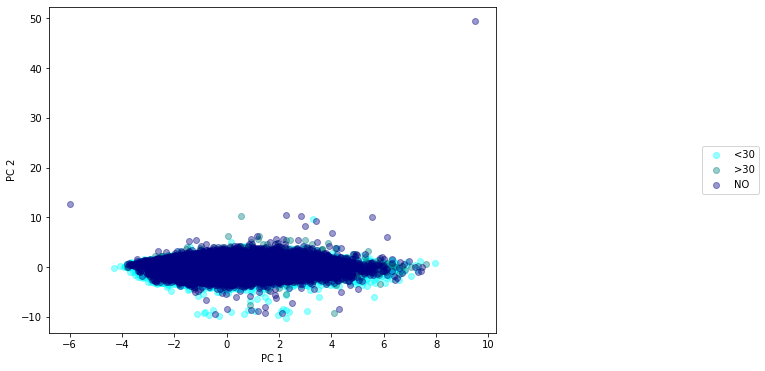

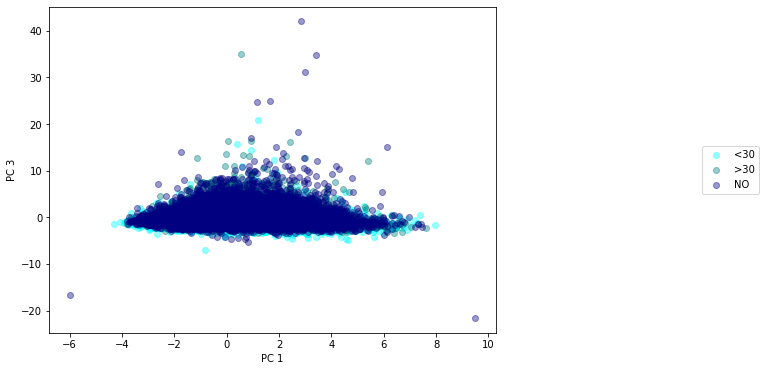

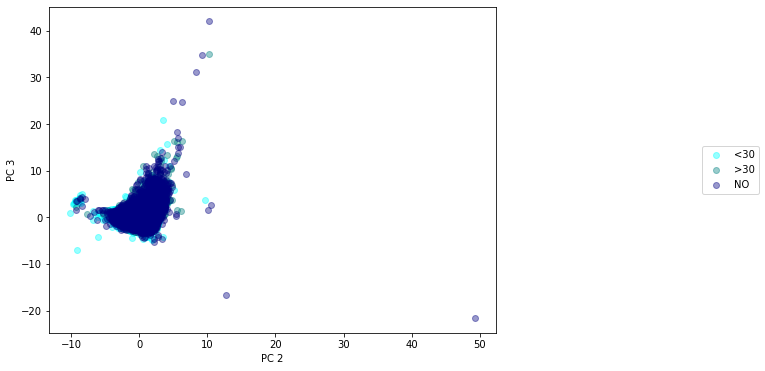

In [16]:
pc1=principalDf['principal component 1'].to_numpy() #make pc1 and 2 into numpy arrays
pc2=principalDf['principal component 2'].to_numpy()
pc3=principalDf['principal component 3'].to_numpy()
group = condition_nums 
make_pca_plots(pc1,pc2,pc3,group,labels)

In [17]:
len(regions)

35

C:\Users\Kat\anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


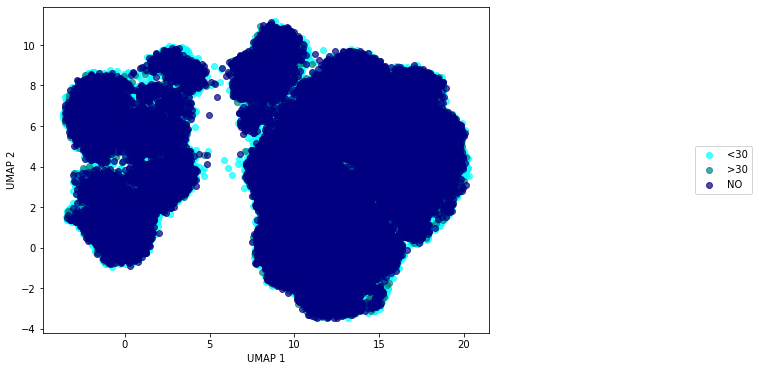

In [18]:
reducer = umap.UMAP(metric='hamming',min_dist=.7) #default parameters except metric- Metric for binary data
# hamming
#played around with parameters quite a bit but no good separation at least for re-admitted vs not
embedding = reducer.fit_transform(X_scaled)
embedding.shape

fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
for g,lab in zip(np.unique(group),np.unique(labels)): #iterate through numbers and labels
    i = np.where(group == g)
    ax.scatter(embedding[i, 0], embedding[i, 1], alpha=0.7,label=lab,c=uniq_colors[g]) #plot each group with unique color and label
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
plt.show()

## PCA and UMAP do not seem to work well in separating these data by whether or not patients would be readmitted.

Not surprising as PCA is generally meant to be used on continuous data. UMAP I am less sure about?


## Let's try MCA? (for categorical data)

In [19]:
import mca #note this MCA package uses pandas df not arrays

In [20]:
first_n=3000
X=dia_data.head(first_n) # cannot handle all data at once so just try first 3000
ncols=len(dia_data.columns)

https://nbviewer.org/github/esafak/mca/blob/master/docs/mca-BurgundiesExample.ipynb

In [21]:
mca_ben = mca.MCA(X, ncols=ncols)

In [22]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=X.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))

table3.loc[fs,    :] = mca_ben.fs_r(N=2).T
table3.loc[cos,   :] = mca_ben.cos_r(N=2).T
table3.loc[cont,  :] = mca_ben.cont_r(N=2).T * 1000


np.round(table3.astype(float), 2)

0     1     2     3     4     5     6     7     8     \
Factor score         1  0.34 -0.08 -0.09 -0.07 -0.07 -0.06 -0.07 -0.07 -0.07   
                     2 -0.00 -0.01  0.16 -0.00 -0.01 -0.00 -0.01 -0.01 -0.00   
Squared cosines      1  1.00  0.99  0.24  1.00  0.91  0.75  0.98  0.95  0.94   
                     2  0.00  0.01  0.75  0.00  0.01  0.00  0.01  0.02  0.00   
Contributions x 1000 1  2.42  0.16  0.12  0.13  0.11  0.07  0.14  0.17  0.19   
                     2  0.00  0.03  9.11  0.01  0.04  0.00  0.04  0.07  0.02   

                        9     ...  2990  2991  2992  2993  2994  2995  2996  \
Factor score         1 -0.03  ... -0.06 -0.09 -0.04 -0.02 -0.07 -0.07 -0.07   
                     2 -0.00  ...  0.00  0.01 -0.00 -0.01 -0.01 -0.01 -0.01   
Squared cosines      1  0.60  ...  0.76  0.90  0.85  0.26  0.93  0.99  0.86   
                     2  0.00  ...  0.00  0.02  0.00  0.05  0.01  0.01  0.02   
Contributions x 1000 1  0.03  ...  0.06  0.22  0.06  0.01  0.17  0.15  0.09   
                     2  0.00  ...  0.00  0.10  0.00  0.04  0.03  0.03  0.05   

                        2997  2998  2999  
Factor score         1 -0.09 -0.09 -0.01  
                     2  0.01 -0.00 -0.00  
Squared cosines      1  0.96  0.94  0.28  
                     2  0.00  0.00  0.00  
Contributions x 1000 1  0.22  0.34  0.00  
                     2  0.02  0.00  0.00  

[6 rows x 3000 columns]

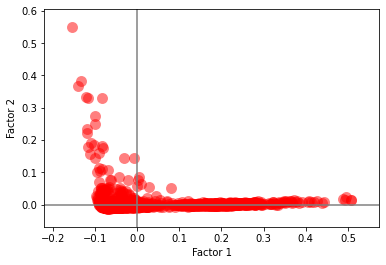

In [23]:
points = table3.loc[fs].values


plt.figure()
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.scatter(*points, s=120, marker='o', c='r', alpha=.5, linewidths=0)
#for label, x, y in zip(labels, *points):
#    plt.annotate(label, xy=(x, y), xytext=(x + .03, y + .03))
plt.show()

In [24]:
len(group[0:1000])

1000

In [25]:
len(points[0,:])

3000

# Ignore second 2 MCA plots 

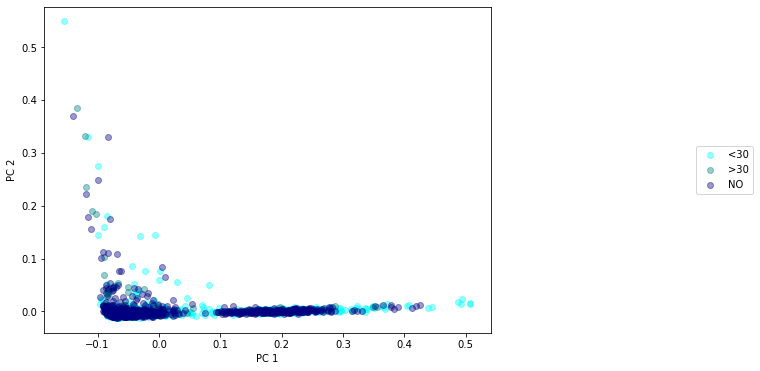

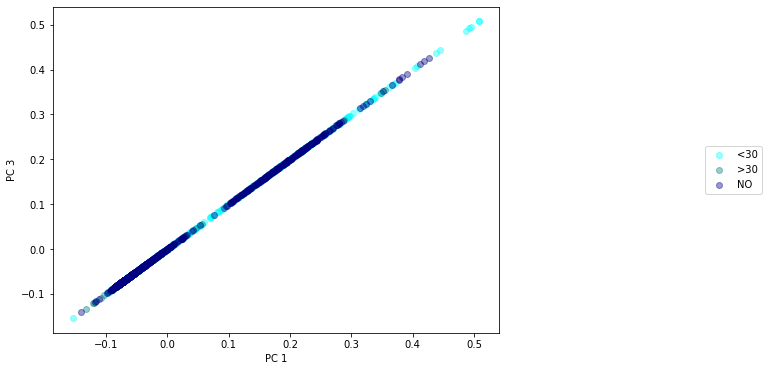

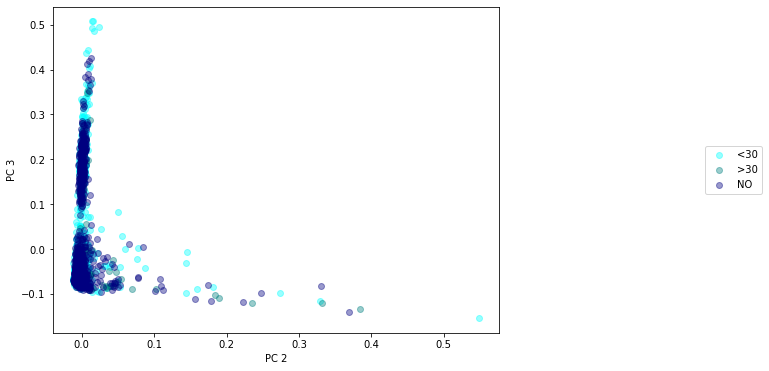

In [26]:
#ignore second 2 plots
#also this is mca not pca plots
#i'm just re-using the function
make_pca_plots(points[0,:],points[1,:],points[0,:],group[0:first_n],labels[0:first_n])